In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('twitter_training.csv').astype(str)
df_test = pd.read_csv('twitter_validation.csv').astype(str)
df.head(100)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
95,2417,Borderlands,Negative,Grounded almost looked pretty cool even despit...
96,2417,Borderlands,Negative,Grounded looked cool despite the borderline un...
97,2417,Borderlands,Negative,"Grosskreutz looked pretty cool, even despite t..."
98,2417,Borderlands,Negative,Grounded almost looked pretty cool here despit...


In [2]:
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [3]:
df.shape

(74681, 4)

In [4]:
df_test.shape

(999, 4)

In [5]:
# Data Cleaning

df_test = df_test.rename(columns={"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "Tweets", "Irrelevant":"Result"})
df = df.rename(columns={'Positive':'Result','im getting on borderlands and i will murder you all ,':'Tweets'})
df_test = df_test.drop(columns=['3364', 'Facebook'])
df = df.drop(columns=['2401','Borderlands'])

In [6]:
df_test.sample(4)

,Result,Tweets
689,Irrelevant,"Ahh man, I have zero friends on\nTwitter so I ..."
64,Neutral,Johnson&Johnson to stop selling baby powder in...
319,Positive,#WorldCupAtHome: Five African matches you woul...
68,Negative,@EAMaddenNFL hi I am am trying to do the golde...


In [7]:
df.sample(4)

,Result,Tweets
28740,Positive,@ PlayApex Guys... I just want to say that thi...
37487,Neutral,Successfully streamed today!!. Thanks to @Ridi...
43747,Negative,.....
60664,Negative,with extremists


In [8]:
# Dropping rows having irrelavent values

df_irr = df.loc[df["Result"]=='Irrelevant']
irr_index = df_irr.index
df = df.drop(labels=irr_index, axis=0)
df["Result"].value_counts()

Negative    22542
Positive    20831
Neutral     18318
Name: Result, dtype: int64

In [9]:
# Dropping rows having irrelavent values for testing dataset

df_test_irr = df_test.loc[df_test["Result"]=='Irrelevant']
test_irr_index = df_test_irr.index
df_test = df_test.drop(labels=test_irr_index, axis=0)
df_test["Result"].value_counts()

Neutral     285
Positive    277
Negative    266
Name: Result, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Result']= encoder.fit_transform(df['Result'])
# For Testing Dataset
df_test['Result']= encoder.fit_transform(df_test['Result'])
# 1 = Neutral, 2= Positive, 0=Negative

In [11]:
df_test.head(200)

,Result,Tweets
0,1,BBC News - Amazon boss Jeff Bezos rejects clai...
1,0,@Microsoft Why do I pay for WORD when it funct...
2,0,"CSGO matchmaking is so full of closet hacking,..."
3,1,Now the President is slapping Americans in the...
4,0,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
234,0,@AndroidDev I've just noticed an issue while u...
235,1,"@GhostRecon so far playing the new update, the..."
236,1,Johnson & Johnson Medical Devices Companies is...
237,2,This skin for Revenant looks dope!! greasygame...


In [12]:
df.head()

,Result,Tweets
0,2,I am coming to the borders and I will kill you...
1,2,im getting on borderlands and i will kill you ...
2,2,im coming on borderlands and i will murder you...
3,2,im getting on borderlands 2 and i will murder ...
4,2,im getting into borderlands and i can murder y...


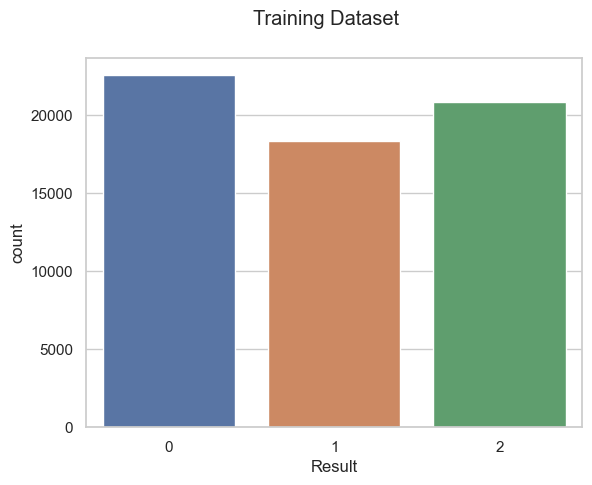

In [13]:
# visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Result"])
plt.suptitle("Training Dataset")
plt.show()

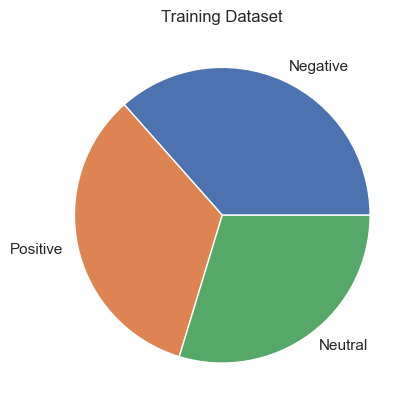

In [14]:
plt.pie(df['Result'].value_counts(), labels = ['Negative', 'Positive', 'Neutral' ])
plt.title("Training Dataset")
plt.show()

We have more neutral values!

In [15]:
import nltk
nltk.download("stopwords")
# nltk.download("PorterStemmer")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stopwords.words('english')
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    ps = PorterStemmer()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation and i.isalnum():
            y.append(ps.stem(i))
    return " ".join(y)


In [17]:
# Apply the method to our dataset.
import nltk
nltk.download('punkt')
df['Preprocessed'] = df['Tweets'].apply(preprocessing)
df_test['Preprocessed'] = df_test['Tweets'].apply(preprocessing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Save the training dataframe to a CSV file
df.to_csv("training_dataset_preprocessed.csv", index=False)
# Save the testing dataframe to a CSV file
df_test.to_csv("testing_dataset_preprocessed.csv", index=False)

In [19]:
# Load the new preprocessed dataset
df_test_preprocessed = pd.read_csv('testing_dataset_preprocessed.csv').astype(str)
df_train_preprocessed = pd.read_csv('training_dataset_preprocessed.csv').astype(str)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [21]:
X_Train = cv.fit_transform(df_train_preprocessed['Preprocessed']).toarray()
X_Train.shape

(61691, 19913)

In [22]:
Y_Train = df_train_preprocessed['Result'].values
Y_Train.shape

(61691,)

In [23]:
X_Test = cv.transform(df_test_preprocessed['Preprocessed']).toarray()
X_Test.shape

(828, 19913)

In [24]:
Y_Test = df_test_preprocessed['Result'].values
Y_Test.shape

(828,)

In [25]:
Model = ["Logistic", "Gaussian", "Multinomial", "Bernoullis"]
Accuracy = []
Precision = []

In [26]:
from sklearn.linear_model import LogisticRegression

print("Model Fitting Starting..")
# Create an instance of the LogisticRegression model
logistic_regression = LogisticRegression()

# Fit the logistic regression model to your training data
logistic_regression.fit(X_Train, Y_Train)
print("Fitting Done. Now predicting...")
# Predict the sentiment on your test data
y_pred = logistic_regression.predict(X_Test)
print("Completed :)")

Model Fitting Starting..


C:\Users\PRIYANKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting Done. Now predicting...
Completed :)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Calculations Starting..")
# Calculate accuracy
accuracy = accuracy_score(Y_Test, y_pred)
print("Accuracy Calculated!")
Accuracy.append(accuracy)
# Calculate precision
precision = precision_score(Y_Test, y_pred, average='macro')
print("Precision Calculated!")
Precision.append(precision)
# Calculate recall
recall = recall_score(Y_Test, y_pred, average='macro')
print("Recall Calculated!")
# Calculate F1 score
f1 = f1_score(Y_Test, y_pred, average='macro')
print("Finally, F1 Calculated!")

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Calculations Starting..
Accuracy Calculated!
Precision Calculated!
Recall Calculated!
Finally, F1 Calculated!
Accuracy: 0.928743961352657
Precision: 0.9286478789940057
Recall: 0.9290174895723062
F1 Score: 0.928663418471572


In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score  
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [29]:
# Gaussian

print("Fitting into Gaussian")
gnb.fit(X_Train, Y_Train)
print("Fitting Done. Now predicting...")
pred1 = gnb.predict(X_Test)
print(accuracy_score(Y_Test, pred1))
print(precision_score(Y_Test, pred1, average='micro'))

Accuracy.append(accuracy_score(Y_Test, pred1))
Precision.append(precision_score(Y_Test, pred1, average='micro'))

Fitting into Gaussian
Fitting Done. Now predicting...
0.6859903381642513
0.6859903381642513


In [30]:
# Multinomial

print("Fitting into Multinomial")
mnb.fit(X_Train, Y_Train)
print("Fitting Done. Now predicting...")
pred2 = mnb.predict(X_Test)
print(accuracy_score(Y_Test, pred2))
print(precision_score(Y_Test, pred2, average='micro'))
Accuracy.append(accuracy_score(Y_Test, pred2))
Precision.append(precision_score(Y_Test, pred2,average='micro'))

Fitting into Multinomial
Fitting Done. Now predicting...
0.7995169082125604
0.7995169082125604


In [31]:
# Binomial

print("Fitting into Binomial")
bnb.fit(X_Train, Y_Train)
print("Fitting Done. Now predicting...")
pred3 = bnb.predict(X_Test)
print(accuracy_score(Y_Test, pred3))
print(precision_score(Y_Test, pred3, average='micro'))
Accuracy.append(accuracy_score(Y_Test, pred3))
Precision.append(precision_score(Y_Test, pred3, average='micro'))

Fitting into Binomial
Fitting Done. Now predicting...
0.7958937198067633
0.7958937198067633


In [32]:
print(Accuracy)
print(Precision)

[0.928743961352657, 0.6859903381642513, 0.7995169082125604, 0.7958937198067633]
[0.9286478789940057, 0.6859903381642513, 0.7995169082125604, 0.7958937198067633]
